### 1. 데이터셋 준비

In [26]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.python.keras.utils import np_utils

In [22]:
# 로이터에서 제공하는 뉴스와이어 데이터셋

# 11,228개의 샘플로 46개의 주제 (0~45)
# 정수로 인코되어 있으며, 정수값은 단어의 빈도수를 의미

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=15000)

In [23]:
X_val = X_train[7000:]
y_val = y_train[7000:]
X_train = X_train[:7000]
y_train = y_train[:7000]

In [24]:
# 문장 길이 맞추기

X_train = sequence.pad_sequences(X_train, maxlen=120)
X_val = sequence.pad_sequences(X_val, maxlen=120)
X_test = sequence.pad_sequences(X_test, maxlen=120)

In [27]:
# one-hot 인코딩

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 2. 모델 준비

#### 1) 다층퍼셉트론 신경망 모델

In [28]:
max_features = 15000
text_max_words = 120

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Dropout
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D

In [29]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
    # input_dim : 단어 사전의 크기, output_dim : 임베딩 벡터 크기
    # input_length : 문장의 길이 (다음 층이 플래틍 레이터라면 반드시 지정해야)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
110/110 [==============================] - 5s 47ms/step - loss: 1.9299 - accuracy: 0.5236 - val_loss: 1.4704 - val_accuracy: 0.6534
Epoch 2/10
110/110 [==============================] - 5s 45ms/step - loss: 0.8617 - accuracy: 0.8067 - val_loss: 1.2952 - val_accuracy: 0.6978
Epoch 3/10
110/110 [==============================] - 5s 45ms/step - loss: 0.2803 - accuracy: 0.9493 - val_loss: 1.3617 - val_accuracy: 0.6927
Epoch 4/10
110/110 [==============================] - 5s 47ms/step - loss: 0.1849 - accuracy: 0.9607 - val_loss: 1.3550 - val_accuracy: 0.6983
Epoch 5/10
110/110 [==============================] - 5s 46ms/step - loss: 0.1471 - accuracy: 0.9620 - val_loss: 1.4060 - val_accuracy: 0.6806
Epoch 6/10
110/110 [==============================] - 5s 46ms/step - loss: 0.1264 - accuracy: 0.9643 - val_loss: 1.4064 - val_accuracy: 0.6958
Epoch 7/10
110/110 [==============================] - 5s 46ms/step - loss: 0.1208 - accuracy: 0.9633 - val_loss: 1.4701 - val_accuracy: 0.6806

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

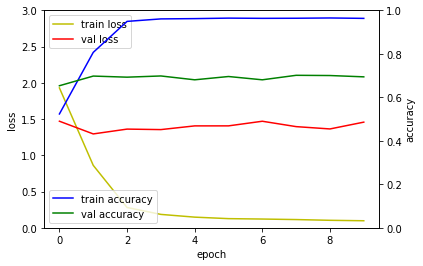

In [33]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [34]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

36/36 [==============================] - 0s 6ms/step - loss: 1.4660 - accuracy: 0.6834
## evaluation loss and metrics ##
[1.4660457372665405, 0.6834372282028198]


#### 2) 순환 신경망 모델

In [35]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
110/110 [==============================] - 16s 149ms/step - loss: 2.5170 - accuracy: 0.3680 - val_loss: 2.1448 - val_accuracy: 0.4733
Epoch 2/10
110/110 [==============================] - 16s 148ms/step - loss: 1.9272 - accuracy: 0.4963 - val_loss: 1.7614 - val_accuracy: 0.5343
Epoch 3/10
110/110 [==============================] - 20s 179ms/step - loss: 1.7706 - accuracy: 0.5221 - val_loss: 1.7477 - val_accuracy: 0.5373
Epoch 4/10
110/110 [==============================] - 25s 226ms/step - loss: 1.6041 - accuracy: 0.5771 - val_loss: 1.5991 - val_accuracy: 0.5898
Epoch 5/10
110/110 [==============================] - 21s 194ms/step - loss: 1.4184 - accuracy: 0.6297 - val_loss: 1.5525 - val_accuracy: 0.6090
Epoch 6/10
110/110 [==============================] - 20s 180ms/step - loss: 1.2124 - accuracy: 0.6833 - val_loss: 1.4646 - val_accuracy: 0.6342
Epoch 7/10
110/110 [==============================] - 19s 177ms/step - loss: 0.9885 - accuracy: 0.7447 - val_loss: 1.4731 - val_ac

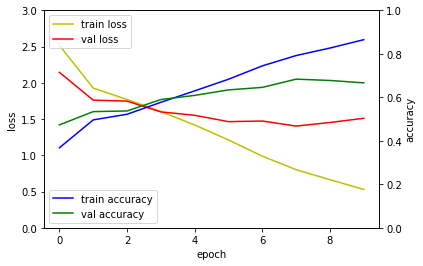

In [38]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [39]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

36/36 [==============================] - 2s 47ms/step - loss: 1.6324 - accuracy: 0.6474
## evaluation loss and metrics ##
[1.6324241161346436, 0.6473730802536011]


#### 3) 컨볼루션 신경망 모델

In [40]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
110/110 [==============================] - 8s 75ms/step - loss: 2.2299 - accuracy: 0.4539 - val_loss: 1.7454 - val_accuracy: 0.5429
Epoch 2/10
110/110 [==============================] - 8s 73ms/step - loss: 1.5595 - accuracy: 0.6247 - val_loss: 1.3455 - val_accuracy: 0.6867
Epoch 3/10
110/110 [==============================] - 8s 72ms/step - loss: 1.2169 - accuracy: 0.7123 - val_loss: 1.1844 - val_accuracy: 0.7215
Epoch 4/10
110/110 [==============================] - 8s 74ms/step - loss: 0.9949 - accuracy: 0.7570 - val_loss: 1.1092 - val_accuracy: 0.7442
Epoch 5/10
110/110 [==============================] - 11s 101ms/step - loss: 0.8007 - accuracy: 0.8027 - val_loss: 1.0695 - val_accuracy: 0.7533
Epoch 6/10
110/110 [==============================] - 13s 115ms/step - loss: 0.6109 - accuracy: 0.8483 - val_loss: 1.0348 - val_accuracy: 0.7639
Epoch 7/10
110/110 [==============================] - 14s 128ms/step - loss: 0.4502 - accuracy: 0.8840 - val_loss: 1.0659 - val_accuracy: 

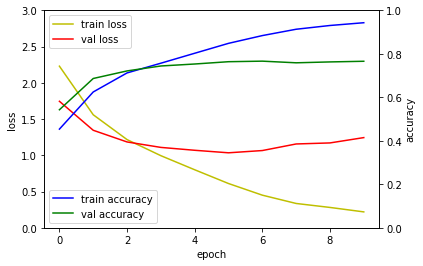

In [43]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [44]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

36/36 [==============================] - 1s 14ms/step - loss: 1.3003 - accuracy: 0.7587
## evaluation loss and metrics ##
[1.3003168106079102, 0.7586820721626282]


#### 4) 순환 컨볼루션 신경망 모델

In [48]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
110/110 [==============================] - 12s 112ms/step - loss: 2.1584 - accuracy: 0.4587 - val_loss: 1.7677 - val_accuracy: 0.5348
Epoch 2/10
110/110 [==============================] - 12s 108ms/step - loss: 1.5871 - accuracy: 0.6011 - val_loss: 1.4714 - val_accuracy: 0.6337
Epoch 3/10
110/110 [==============================] - 12s 110ms/step - loss: 1.2489 - accuracy: 0.6874 - val_loss: 1.3630 - val_accuracy: 0.6569
Epoch 4/10
110/110 [==============================] - 18s 164ms/step - loss: 1.0123 - accuracy: 0.7426 - val_loss: 1.2798 - val_accuracy: 0.6867
Epoch 5/10
110/110 [==============================] - 25s 224ms/step - loss: 0.8346 - accuracy: 0.7913 - val_loss: 1.2813 - val_accuracy: 0.7028
Epoch 6/10
110/110 [==============================] - 17s 159ms/step - loss: 0.6886 - accuracy: 0.8237 - val_loss: 1.2939 - val_accuracy: 0.7028
Epoch 7/10
110/110 [==============================] - 14s 129ms/step - loss: 0.5709 - accuracy: 0.8556 - val_loss: 1.3173 - val_ac

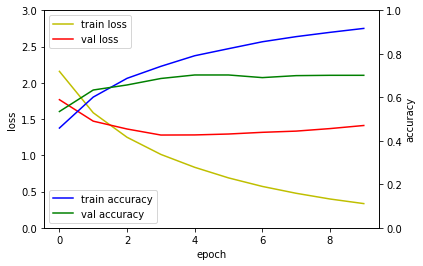

In [51]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [52]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

36/36 [==============================] - 1s 32ms/step - loss: 1.5073 - accuracy: 0.6763
## evaluation loss and metrics ##
[1.5073388814926147, 0.6763134598731995]
